In [1]:
import numpy as np
import pylab as pl
import matplotlib.pyplot as plt

In [2]:
def default_line(x,t):
    if t == 0:
        return 0
    if x == 0:
        return 2 * t
    if x == 1:
        return 3 * t * t
    return 0

In [3]:
def dop_func(x,t):
    return t * (np.exp(x) - np.exp(-x))/2

In [4]:
def create_matr(nx, x = 1, t = 0.5):
    
    h = x/nx
    nt = int(np.ceil(t/(h*h/2)))
    
    s = t/nt
    
    q = s/(h*h)
    
    hx = np.linspace(0,x,nx)
    ht = np.linspace(0,t,nt)
    
    matr = np.zeros((nt,nx))
    return [matr,hx,ht, q,s]

In [5]:
def fulling_matr(matr,hx,ht,q,s):
    for i in range(len(ht)):
        for j in range(len(hx)):
            if (hx[j] == 0) or (hx[j] == 1) or (ht[i] == 0):
                matr[i,j] = default_line(hx[j], ht[i])
            else:
                matr[i,j] = q * matr[i-1, j-1] + (1 - 2 * q) * matr[i-1, j] + q * matr[i-1, j+1] + s* dop_func(hx[j], ht[i])
    return matr

In [6]:
def get_temp(matr):    
    return matr[matr.shape[0]-1, int((matr.shape[1] - 1)/2) + 1]

In [7]:
def solve(n):
    matr,hx,ht,q,s = create_matr(n)
    matr = fulling_matr(matr,hx,ht,q,s)
    return [get_temp(matr),matr]

In [15]:
def print_m(matr):
    pl.matshow(matr)
    pl.colorbar()
    pl.figure(figsize=(10,5))
    #pl.set_figwidth(12)    #  ширина Figure
    #pl.set_figheight(6) 
    pl.show()

In [29]:
def print_m_2(matr):
    #fig, ax = plt.subplots()
    #plt.figure(figsize=(10,10))
    plt.figure()
    plt.imshow(matr)

    plt.set_cmap('hot')
    plt.savefig("frame.png")
    #fig.set_figwidth(12)    #  ширина и
    #fig.set_figheight(6)    #  высота "Figure"

    plt.show()

In [9]:
m = []
for i in range(3,50):
    r = solve(i)
    m.append(r[0])

In [10]:
m[3:20]

[0.6718482318891444,
 0.6605410330071073,
 0.6619002239787286,
 0.6515994047035474,
 0.6556808950382623,
 0.6465529812114595,
 0.6514210178379842,
 0.6433036369687443,
 0.6483258067532468,
 0.6410403577482212,
 0.6459584647452107,
 0.6393757291904393,
 0.6441021983818414,
 0.6381028273125631,
 0.6426041798562201,
 0.637094781141348,
 0.6413696292713943]

In [11]:
np.mean(m)

0.6444827634759931

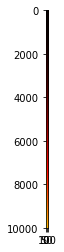

In [30]:
r = solve(100)
print_m_2(r[1])